## Classification Metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries we need
from __future__ import division
import numpy as np
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load iris dataset
data_holder = load_iris()
print(data_holder.data.shape)
print(data_holder.target.shape)

(150, 4)
(150,)


In [4]:
# set our X and y to data and target values
X , y = data_holder.data, data_holder.target

In [5]:
# let's split into 70/30: train=70% and test=30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state = 0)

In [6]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print()
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

X train shape:  (90, 4)
X test shape:  (60, 4)

y train shape:  (90,)
y test shape:  (60,)


In [7]:
# we'll set it to some parameters, but we'll go through depth on parameter tuning later
model = SVC(kernel='linear', C=1)
# fit our training data
model.fit(X_train, y_train)
#let's predict 
pred = model.predict(X_test)

### Accuracy Score

![Accuracy](../../../img/acc.gif)

This works well only if there are equal number of samples belonging to each class.

In [8]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9666666666666667

### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

<img style="float:left;" src="https://image.slidesharecdn.com/finalcustlingprofiling-160226163538/95/customer-linguistic-profiling-10-638.jpg?cb=1456504658" width=600 height=300>

In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]


The confusion matrix enables us to derive other important classification metrics:

- *Precision* : It is the number of correct positive results divided by the number of positive results predicted by the classifier.
- *Recall* : It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).
- *F1-Score* : It is the Harmonic Mean between precision and recall. It tries to find the balance between precision and recall.

In [10]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        21

   micro avg       0.97      0.97      0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



### Area Under Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

True Positive Rate (Sensitivity) :  True Positive Rate corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.

![tpr](../../../img/tpr.gif)

False Positive Rate (Specificity) : False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.

![fpr](../../../img/fpr.gif)

In [11]:
classifier = SVC(kernel='linear', probability=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
probas_ = classifier.fit(X_train[y_train != 2], y_train[y_train != 2]).predict_proba(X_test[y_test != 2])
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test[y_test != 2], probas_[:, 1])
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

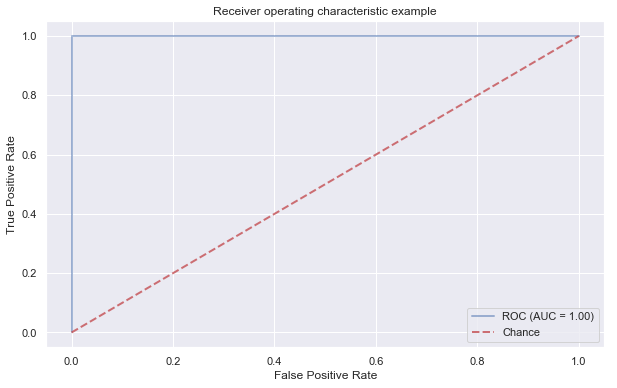

In [12]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, lw=2, alpha=0.5,
             label='ROC (AUC = %0.2f)' % ( roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [13]:
X, y = make_classification(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [14]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

from sklearn.preprocessing import Binarizer

def plot_roc(y_test, clf):
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, ths = roc_curve(y_test, y_pred)
    auc_val = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color="red", label="AUC = {0:.2f}".format(auc_val))
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    plt.title("ROC Curve\n")
    ax1.set_xlim((-0.01, 1.01))
    ax1.set_ylim((-0.01, 1.01))
    ax1.set_xticks(np.linspace(0, 1, 11))
    ax1.plot([0, 1], [0, 1], color="blue")
    ax1.legend(loc="lower right")


C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


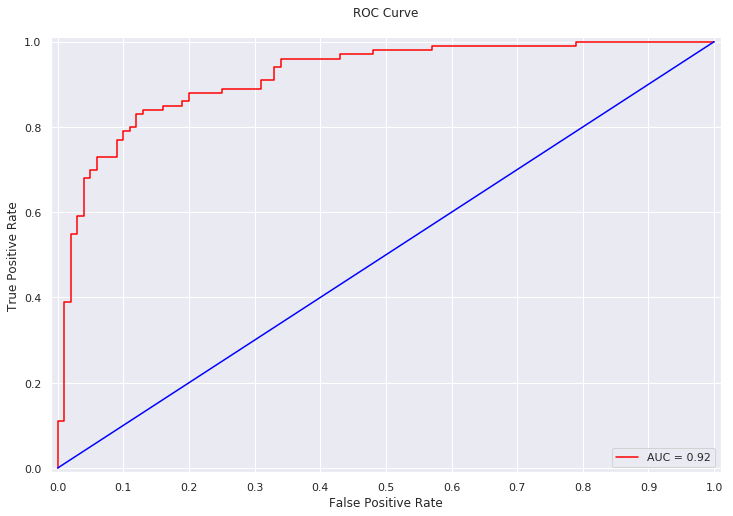

In [15]:
fig = plt.figure(figsize=(12, 8))
values = []
ax1 = fig.add_subplot(111)
plot_roc(y_test, clf)